Paquetes necesarios

In [12]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Carga la imagen, la convierte a gris
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

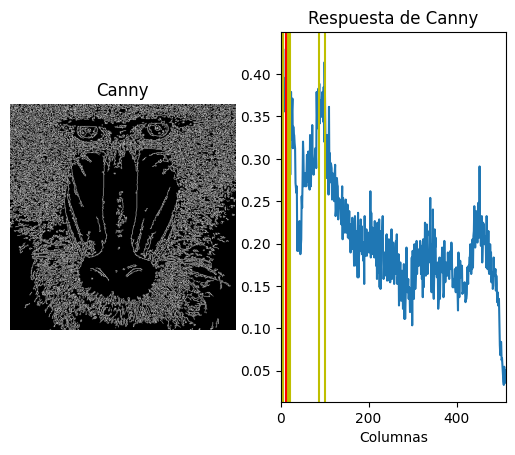

In [14]:
# Aplica Canny (detector de bordes)
canny = cv2.Canny(gris, 100, 200)

# Suma los valores de los pixeles blancos por columna y por fila
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza los valores (0-1)
cols = col_counts[0] / (255 * canny.shape[0])
rows = row_counts[:,0] / (255 * canny.shape[1])

# Encuentra el máximo en filas y su posición
maxfil = np.max(rows)
maxpos = np.where(rows == maxfil)[0][0]

# Encuentra todas las posiciones que superan el 90% del máximo
rows_conditioned = np.where(rows > maxfil*0.9)[0]

# Muestra la imagen del canny a la izquierda
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

# Muestra el gráfico del conteo de filas a la derecha
plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, canny.shape[1]])

# Dibuja en el gráfico líneas verticales amarillas en las posiciones que superan el 90% del máximo
for r in rows_conditioned:
    plt.axvline(x=r, color='y')

# Dibuja en el gráfico una línea roja en la posición del máximo
plt.axvline(x=maxpos, color='r')

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

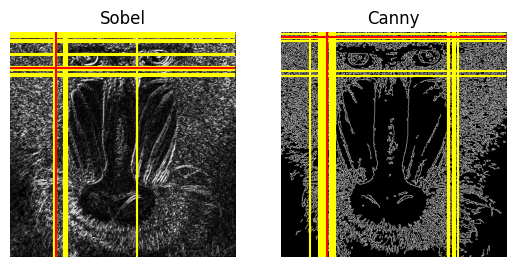

In [15]:
# Aplica suavizado Gaussiano para reducir ruido
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Aplica el filtro Sobel en ambas direcciones para detectar bordes
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)

# Conversión a byte con openCV
sobel8 = cv2.convertScaleAbs(sobel)

# Aplica un umbral para binarizar la imagen
valorUmbral = 130
_, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)

# Suma los valores de los pixeles blancos por columna y por fila para Sobel
col_counts_sobel = cv2.reduce(sobel8, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts_sobel = cv2.reduce(sobel8, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Suma los valores de los pixeles blancos por columna y por fila para Canny
col_counts_canny = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts_canny = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza los valores (0-1) para Sobel del número de pixeles blancos
cols_sobel = col_counts_sobel[0] / (255 * sobel8.shape[0])
rows_sobel = row_counts_sobel[:,0] / (255 * sobel8.shape[1])

# Normaliza los valores (0-1) para Canny del número de pixeles blancos
cols_canny = col_counts_canny[0] / (255 * canny.shape[0])
rows_canny = row_counts_canny[:,0] / (255 * canny.shape[1])

# Subplot 1: Imagen Sobel con líneas estadísticas
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(sobel8, cmap='gray') 

# Obtiene los valores máximos de filas y columnas para Sobel y sus posiciones
col_max_sobel = np.max(cols_sobel)
row_max_sobel = np.max(rows_sobel)
cols_over_90_sobel = np.where(cols_sobel > col_max_sobel * 0.90)[0]
rows_over_90_sobel = np.where(rows_sobel > row_max_sobel * 0.90)[0]

# Dibuja líneas amarillas en las posiciones que superan el 90% del máximo de columnas (Sobel)
for c in cols_over_90_sobel:
    plt.axvline(x=c, color='yellow')

# Dibuja líneas amarillas en las posiciones que superan el 90% del máximo de filas (Sobel)
for r in rows_over_90_sobel:
    plt.axhline(y=r, color='yellow')

# Dibuja líneas rojas en las posiciones de los máximos absolutos (Sobel)
plt.axvline(x=np.where(cols_sobel == col_max_sobel)[0][0], color='red')
plt.axhline(y=np.where(rows_sobel == row_max_sobel)[0][0], color='red')

# Subplot 2: Imagen Canny con líneas estadísticas
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

# Obtiene los valores máximos de filas y columnas para Canny y sus posiciones
col_max_canny = np.max(cols_canny)
row_max_canny = np.max(rows_canny)
cols_over_90_canny = np.where(cols_canny > col_max_canny * 0.90)[0]
rows_over_90_canny = np.where(rows_canny > row_max_canny * 0.90)[0]

# Dibuja líneas amarillas en las posiciones que superan el 90% del máximo de columnas (Canny)
for c in cols_over_90_canny:
    plt.axvline(x=c, color='yellow')

# Dibuja líneas amarillas en las posiciones que superan el 90% del máximo de filas (Canny)
for r in rows_over_90_canny:
    plt.axhline(y=r, color='yellow')

# Dibuja líneas rojas en las posiciones de los máximos absolutos (Canny)
plt.axvline(x=np.where(cols_canny == col_max_canny)[0][0], color='red')
plt.axhline(y=np.where(rows_canny == row_max_canny)[0][0], color='red')

plt.show()

TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [16]:
# Captura de video desde la cámara
vid = cv2.VideoCapture(0)

# Define el número de modos y el modo inicial
N_MODOS = 6
nodo = 1

while(True):      
    ret, frame = vid.read()

    if ret:
        # Voltea la imagen horizontalmente para un efecto de espejo
        frame = cv2.flip(frame, 1)

        match nodo:
            case 1:
                # Aplica el filtro Sobel en ambas direcciones para detectar bordes sobre BGR
                sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0)  # x
                sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1)  # y
                output = cv2.add(sobelx, sobely)
                pass
            case 2:
                # Aplica un umbral alto para binarizar la imagen sobre BGR
                _, output = cv2.threshold(frame, 200, 255, cv2.THRESH_BINARY)
                pass
            case 3:
                # Aplica Canny para detección de bordes
                output = cv2.Canny(frame, 100, 200)
                pass
            case 4:
                # Aplica un colormap de tipo JET para un efecto térmico
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                output = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
                pass
            case 5:
                # Aplica un efecto de negativo usando numpy
                output = 255 - frame
                pass
            case _:
                # Aplica un efecto pixelado
                h, w = frame.shape[:2]
                temp = cv2.resize(frame, (w//20, h//20), interpolation=cv2.INTER_LINEAR)
                output = cv2.resize(temp, (w, h), interpolation=cv2.INTER_NEAREST)
                pass
        
        # Muestra la imagen resultante
        cv2.imshow('Tarea', output)

    # Captura la tecla pulsada
    tecla = cv2.waitKey(20)
    if tecla == 27:  # ESC
        break # Sale del bucle
    elif tecla == 32:  # Espacio
        nodo = (nodo + 1) % N_MODOS # Pasa al siguiente modo


# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [18]:
# Captura de video desde la cámara y creación de un lienzo
vid = cv2.VideoCapture(0)
canvas = None

while True:
    ret, frame = vid.read()
    if ret:
        # Voltea la imagen horizontalmente para un efecto de espejo
        frame = cv2.flip(frame, 1)

        # Inicializa el lienzo si no existe
        if canvas is None:
            canvas = np.zeros_like(frame)

        # Detección de rojo
        mask = cv2.GaussianBlur(frame, (9,9), 0)
        lower_red = np.array([0, 0, 100])    # B, G, R mínimos
        upper_red = np.array([100, 100, 255]) # B, G, R máximos
        mask = cv2.inRange(mask, lower_red, upper_red)

        # Encuentra contornos en la máscara
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            # Cogemos el contorno más grande
            c = max(contours, key=cv2.contourArea)

            # Descarta contornos muy pequeños
            if cv2.contourArea(c) > 500:
                # Calcula el rectángulo delimitador y el centro (cx, cy)
                x, y, w, h = cv2.boundingRect(c)
                cx = x + w // 2
                cy = y + h // 2

                # Dibuja un círculo en el lienzo y en el frame
                cv2.circle(canvas, (cx, cy), 15, (0,0,255), -1)
                cv2.circle(frame, (cx, cy), 15, (255,255,255), 2)

        # Combina el frame y el lienzo
        output = cv2.add(frame, canvas)
        cv2.imshow("Pincel por Color", output)

    # Captura la tecla pulsada
    tecla = cv2.waitKey(40)
    if tecla == 27:  # ESC
        break
    elif tecla == ord('c'):  # limpiar lienzo
        canvas = np.zeros_like(frame)

# Libera el objeto de captura
vid.release()
cv2.destroyAllWindows()